<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793506/blob/main/IBM2/Modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###MAESTRIA EN INTELIGENCIA ARTIFICIAL APLICADA
###CIENCIA Y ANALÍTICA DE DATOS
###CURSO IBM DATA ANALYSIS WITH PYTHON
###NOMBRE: ERICK NAJERA OLIVERO
###MATRICULA: A01793506
###MODULO 3


In [32]:
#Cargue del conjunto de datos para prueba de los ejercicios
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

url = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/Cartwheeldata.csv'
df = pd.read_csv(url)

In [2]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,0
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


Metodos para obtener estadisticas de los datos, para realizar analisis de la informacion.

Describe(): obtiene estadisticas tal como conteo de registros, valores minimos, maximos, media, cuartiles, omite los NAN.

tambien podemos obtener estadisiticas por medio del metodo value_counts() para variables categoricas.

In [3]:

df.describe()

,ID,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,13.000000,28.240000,1.520000,0.560000,67.650000,66.260000,82.480000,0.76000,6.120000
std,7.359801,6.989754,0.509902,0.506623,4.431187,5.492647,15.058552,0.43589,2.833137
min,1.000000,22.000000,1.000000,0.000000,61.500000,57.500000,63.000000,0.00000,0.000000
25%,7.000000,24.000000,1.000000,0.000000,64.000000,62.000000,70.000000,1.00000,4.000000
50%,13.000000,26.000000,2.000000,1.000000,68.000000,66.000000,81.000000,1.00000,6.000000
75%,19.000000,29.000000,2.000000,1.000000,71.000000,71.000000,92.000000,1.00000,8.000000
max,25.000000,56.000000,2.000000,1.000000,75.000000,76.000000,115.000000,1.00000,10.000000


In [7]:
contador_genero = df['Gender'].value_counts()
contador_genero

M    13
F    12
Name: Gender, dtype: int64

Otro metodo para poder realizar analisis de datos es usar diagramas de cajas y bigotes (boxplot) de la liberia Seaborn, este nos brinda informacion acerca de la concetrancion de los datos de forma visual, asi como la distribución de los mismos, mediana, outliers entre otros.

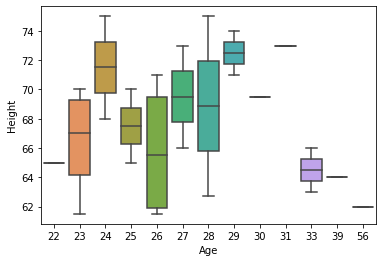

In [9]:
sns.boxplot(x='Age', y='Height', data=df)

tambien podemos usar Scatter plot, el cual muestra graficamente la relación entre dos variables representadas por puntos. las variables indepedientes y la variable a predecir.

Text(0, 0.5, 'Score')

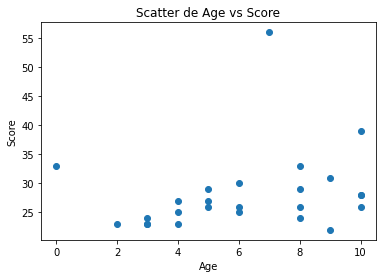

In [15]:
# Ploteamos la variable de entrada 'Age' en el eje x y la variable a predecir o de salida y 'Score'
y = df['Age']
x = df['Score']
plt.scatter(x, y)
plt.title('Scatter de Age vs Score')
plt.xlabel('Age')
plt.ylabel('Score')



Group by - Metodos nos ayudan a encontrar si hay relaciones entre dos mas variables comparandolas, se puede usar en variables ccategoricas, agrupar datos en categorias, puedo agrupar datos sencillos o  multiples variables.

In [20]:
# seleccionamos las columnas de interes para realizar agrupamiento
dft = df[['Age','Height','Score']]
dft.head()
dfg = dft.groupby(['Age', 'Height'], as_index=False).mean()
dfg.head()

,Age,Height,Score
0,22,65.0,9.0
1,23,61.5,4.0
2,23,65.0,3.0
3,23,69.0,2.0
4,23,70.0,3.0


para poder entender la tabla anterior por el metodo Group By podemos usar el metodo Pivot() por medio del cual distribuimos una variable en filas y la otra en columnas

In [21]:
dfp = dfg.pivot(index='Age', columns='Height')
dfp

Score                                                              \
Height 61.50 62.00 62.75 63.00 64.00 65.00 66.00 68.00 69.00 69.50 70.00   
Age                                                                        
22       NaN   NaN   NaN   NaN   NaN   9.0   NaN   NaN   NaN   NaN   NaN   
23       4.0   NaN   NaN   NaN   NaN   3.0   NaN   NaN   2.0   NaN   3.0   
24       NaN   NaN   NaN   NaN   NaN   NaN   NaN   8.0   NaN   NaN   NaN   
25       NaN   NaN   NaN   NaN   NaN   6.0   NaN   NaN   NaN   NaN   4.0   
26      10.0   8.0   NaN   NaN   NaN   NaN   NaN   NaN   5.0   NaN   NaN   
27       NaN   NaN   NaN   NaN   NaN   NaN   5.0   NaN   NaN   NaN   NaN   
28       NaN   NaN  10.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
30       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   6.0   NaN   
31       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
33       NaN   NaN   NaN   8.0   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
39       NaN   NaN   NaN   NaN  10.0   NaN   NaN   NaN   NaN   NaN   NaN   
56       NaN   7.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                                
Height 71.00 73.00 74.00 75.00  
Age                             
22       NaN   NaN   NaN   NaN  
23       NaN   NaN   NaN   NaN  
24       NaN   NaN   NaN   3.0  
25       NaN   NaN   NaN   NaN  
26       6.0   NaN   NaN   NaN  
27       NaN   4.0   NaN   NaN  
28       NaN   NaN   NaN  10.0  
29       8.0   NaN   5.0   NaN  
30       NaN   NaN   NaN   NaN  
31       NaN   9.0   NaN   NaN  
33       NaN   NaN   NaN   NaN  
39       NaN   NaN   NaN   NaN  
56       NaN   NaN   NaN   NaN

Otra manera de representar la tabla que se le aplico el metodo Pivot, es a traves del metodo Heatmap, en este se pueden plotear variables de salida sobre multiples variables de entrada.

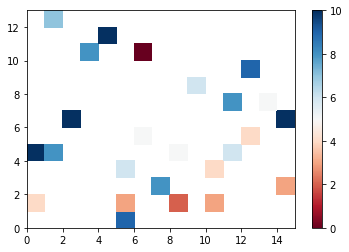

In [22]:
plt.pcolor(dfp, cmap='RdBu')
plt.colorbar()
plt.show()

Analisis de Varianza

Otra forma de comparacion de estadisticas en grupo y ver la correlacion entre diferentes grupos de categorias, esto se puede hacer en python a traves del metodo ANOVA.

In [36]:
#copiamos un df con las vaariables a comparar
dfa = df[['Gender','Height']]
gpa = dfa.groupby(['Gender'])
ar = f_oneway(gpa.get_group('F')['Height'], gpa.get_group('M')['Height'])
ar

F_onewayResult(statistic=59.48049536736392, pvalue=7.992473713567313e-08)